In [1]:
import os
import pandas as pd
import numpy as np
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from mpl_toolkits.basemap import Basemap

/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_V1_96617.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_V1_96617.csv
/kaggle/input/mappng/map.png


Hello!

I am going to analyze this Autrailian fire dataset that was obtained by a satellite to visually see how the deadly fires have evlolved mainly using the matplotlib library.
Let's first load the dataset.

In [2]:
df1=pd.read_csv('../input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv')

A quick peek at the dataset shows that the severity of the fires was represented as "brightness" and each point has latitude and longitude tagged with the times that the datasets were acquired. The 'hours' when the data points were acquired also can be differentiated by looking at the "daynight" column (D represent daytime and N represents nighttime). We are going to visually plot the brightness data on the 'actual' map of Austrailia.

In [3]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [4]:
df1.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

We’re going to import the image sub-package of matplotlib, which handles matplotlib’s image manipulations.
I also uploaded the Austrailian map image file to this kernel.

In [5]:
import matplotlib.image as mpimg
aus_img=mpimg.imread('/kaggle/input/mappng/map.png')

To map brightness values in the map, I first converted latitude, longitude and brightness datatypes to "values" to use them with "Basemap" toolkit.
Lat_0 and lon_0 arguments in the "Basemap" represent the OZMIDLAT and OZMIDLON values respectively for Austrailia.

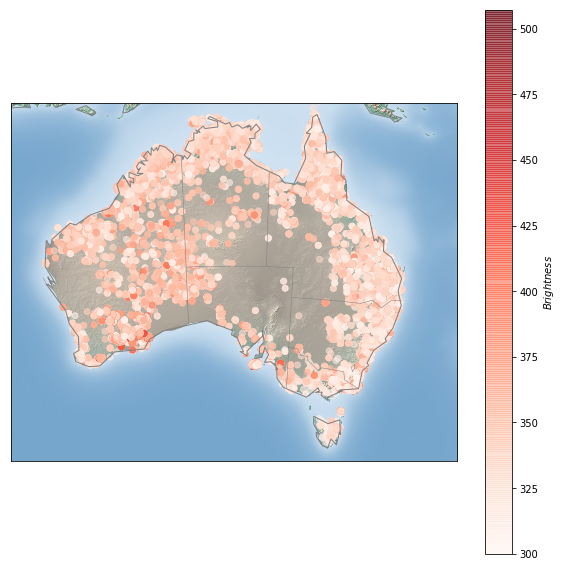

In [6]:
lat = df1['latitude'].values
lon = df1['longitude'].values
brg = df1['brightness'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label=r'$Brightness$')


This is a nice looking map with the brightness level represented as shown in the colorbar.
However, this is the whole data set that has no time information (no time specific)

To get some time specific information, let's differentiate daytime and nighttime brightness data. To do that we apply "isin" function to the pandas dataframe.

In [7]:
df1_night=df1.loc[df1['daynight'].isin(['N'])]
df1_day=df1.loc[df1['daynight'].isin(['D'])]

Then, the same mapping proceudre as above. The red and blue points on the map represent the daytime and nighttime brightness datasets, respectively.

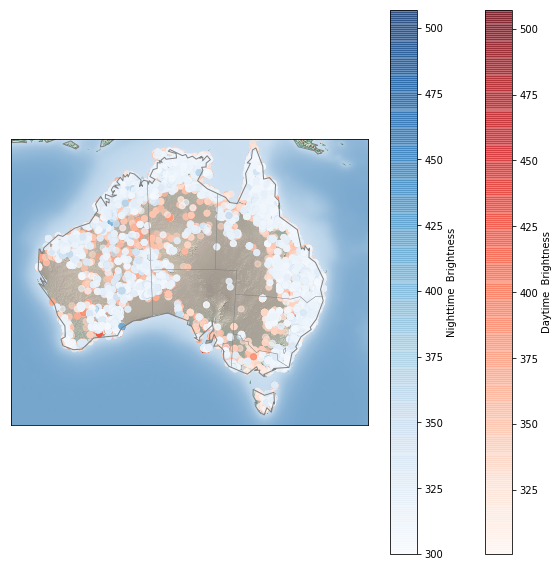

In [8]:
lat_d = df1_day['latitude'].values
lon_d = df1_day['longitude'].values
brg_d = df1_day['brightness'].values

lat_n = df1_night['latitude'].values
lon_n = df1_night['longitude'].values
brg_n = df1_night['brightness'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon_d, lat_d, c= brg_d, latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label='Daytime  Brightness')

m.scatter(lon_n, lat_n, c= np.array(brg_n),latlon=True,cmap='Blues', alpha=0.6)
plt.colorbar(label='Nighttime  Brightness')

It is not easy to see with the two colors overlapped with each other, but we can see that there are points with either red or blue colors. 

Before we jump into looking at the data as a function of 'data acquisition time" , let's take a look at the "high brightness" data points to see which area had been affected with intense fires. I made "450" as a thresold for the brightness level to decide if the fire was intense or not.

In [9]:
df1_hot=df1[df1['brightness']>450]

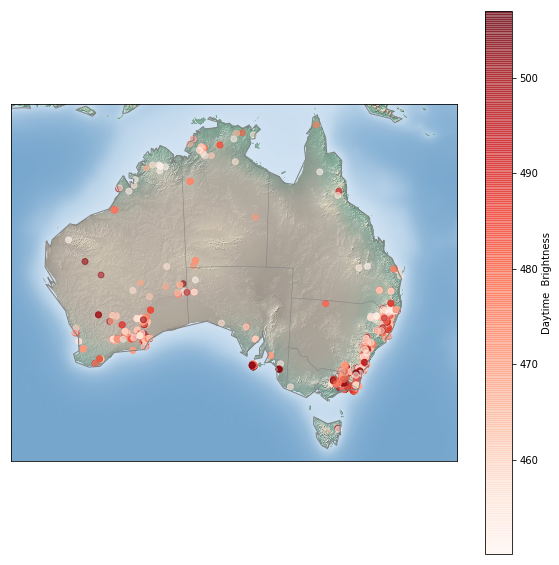

In [10]:
lat_hot=df1_hot['latitude'].values
lon_hot=df1_hot['longitude'].values
brg_hot=c=df1_hot['brightness'].values


fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon_hot,lat_hot,c=brg_hot, latlon=True,cmap='Reds', alpha=0.6)
plt.colorbar(label='Daytime  Brightness')


#plt.figure(figsize=(15,10))
#plt.scatter(df1_hot['longitude'],df1_hot['latitude'],c=df1_hot['brightness'],s=df1_hot['brightness']/5,cmap=plt.get_cmap("gist_heat"))
#plt.colorbar()

From this, we can see that the South-east part of Austrailia (around Sydney) had experienced very intense fires.

Now, time to look at the data in a time domain. We will use "matplotlib.animation" for the animation. Becuase looking at each date will take failry long, I will only look at datasets with a 10 day interval.

NameError: name 'data' is not defined

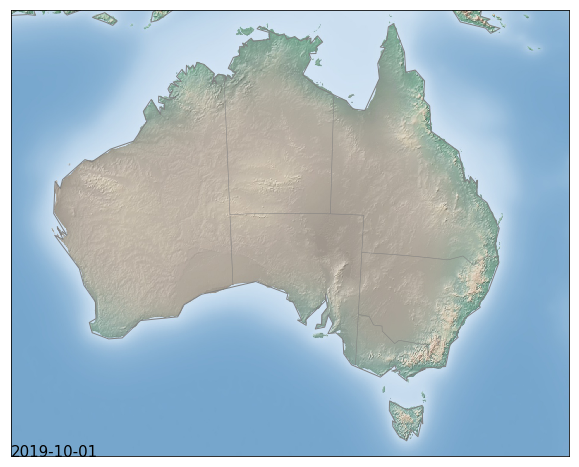

In [11]:
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

time=df1['acq_date'].values

#Putting basemap as a frame
fig = plt.figure(figsize=(10, 10))

m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

#Getting unique data values as we have multiple rows assoicated with each date
uniq_time=np.unique(time)

#showing the start date
date_text = plt.text(-170, 80, uniq_time[0],fontsize=15)

brg_array = data['brightness'].to_numpy()

#very first data to show-brigtness data sets that were obatined on the first acquisition date
data=df1[df1['acq_date'].str.contains(uniq_time[0])]
cmap = plt.get_cmap('Reds')
xs, ys = data['longitude'].values, data['latitude'].values
scat=m.scatter(xs,ys,c=data['brightness'].values,cmap=cmap, latlon=True, alpha=0.6)
plt.colorbar(label='Fire Brightness')

#We will get numbers starting from 0 to the size of the dataframe spaced by "10" as it will take very long to generate animation for all data points.
#Basically we will look at the datasets with a 10-day interval.
empty_index=[]
for i in range(1,len(uniq_time),10):
    empty_index.append(i)    
    
def update(i):
    print(i)
    current_date = uniq_time[i]
    data=df1[df1['acq_date'].str.contains(uniq_time[i])]
    xs, ys = m(data['longitude'].values, data['latitude'].values)
    X=np.c_[xs,ys]
    scat.set_offsets(X)
    date_text.set_text(current_date)
    
ani = matplotlib.animation.FuncAnimation(fig, update, interval=50,frames=empty_index)

#trying to diplay animation with HTML
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

#Exporting the animation to show up correctly on Kaggle kernel. However, this creates an additional unwanted figure at the bottom.
#Let's ignore for this time

import io
import base64

filename = 'animation.gif'

ani.save('animation.gif', writer='imagemagick', fps=1)

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

There is no clear trend in these fires but at least as we approached the new year (2020) the fires are mostly contained along the east coast of Austrailia.
Unfortuantely the intensity of the fires do not seem to have been suppressed as time progresses.